### Filtrando avisos e coleta de dados 

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("data02.csv", low_memory = False)
df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,class
0,73,1,0,0,2,0,1,3,4,1,...,13.0,13.0,13.0,14,0,1,2,0,95,0
1,58,15,4,34,16,0,1,17,18,19,...,13.0,13.0,13.0,14,0,1,2,52,94,0
2,18,1,0,0,30,0,31,32,4,1,...,36.0,36.0,36.0,37,0,1,2,0,95,0
3,9,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0
4,10,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0


In [2]:
df.shape

(46071, 42)

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

age                                               0
class_of_worker                                   0
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                        0
marital_stat                                      0
major_industry_code                               0
major_occupation_code                             0
race                                              0
hispanic_origin                                 183
sex                                               0
member_of_a_labor_union                           0
reason_for_unemployment                           0
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

## Pré-processamento

In [5]:
dfRemove = df.copy()
dfRemove = dfRemove.drop(columns=['migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg','migration_prev_res_in_sunbelt'])
dfRemove.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,class
0,73,1,0,0,2,0,1,3,4,1,...,13.0,13.0,13.0,14,0,1,2,0,95,0
1,58,15,4,34,16,0,1,17,18,19,...,13.0,13.0,13.0,14,0,1,2,52,94,0
2,18,1,0,0,30,0,31,32,4,1,...,36.0,36.0,36.0,37,0,1,2,0,95,0
3,9,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0
4,10,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0


In [6]:
dfRemove.isnull().values.any()

True

In [7]:
dfRemove.isnull().sum()

age                                              0
class_of_worker                                  0
detailed_industry_recode                         0
detailed_occupation_recode                       0
education                                        0
wage_per_hour                                    0
enroll_in_edu_inst_last_wk                       0
marital_stat                                     0
major_industry_code                              0
major_occupation_code                            0
race                                             0
hispanic_origin                                183
sex                                              0
member_of_a_labor_union                          0
reason_for_unemployment                          0
full_or_part_time_employment_stat                0
capital_gains                                    0
capital_losses                                   0
dividends_from_stocks                            0
tax_filer_stat                 

## Imputação de dados

In [8]:
# Df Remocao
dfImputacao = dfRemove.copy()

dfImputacao['hispanic_origin'].fillna(value=dfImputacao['hispanic_origin'].median(),inplace=True)
dfImputacao['state_of_previous_residence'].fillna(value=dfImputacao['state_of_previous_residence'].mean(),inplace=True)
dfImputacao['country_of_birth_father'].fillna(value=dfImputacao['country_of_birth_father'].mean(),inplace=True)
dfImputacao['country_of_birth_mother'].fillna(value=dfImputacao['country_of_birth_mother'].median(),inplace=True)
# dfImputacao['country_of_birth_self'].fillna(method='ffill',inplace=True)
dfImputacao['country_of_birth_self'].fillna(value=dfImputacao['country_of_birth_self'].mean(), inplace=True)

dfImputacao

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,class
0,73,1,0,0,2,0,1,3,4,1,...,13.0,13.0,13.0,14,0,1,2,0,95,0
1,58,15,4,34,16,0,1,17,18,19,...,13.0,13.0,13.0,14,0,1,2,52,94,0
2,18,1,0,0,30,0,31,32,4,1,...,36.0,36.0,36.0,37,0,1,2,0,95,0
3,9,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0
4,10,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46066,31,43,29,38,16,0,1,44,95,145,...,13.0,13.0,13.0,14,0,1,2,52,95,0
46067,6,1,0,0,38,0,1,32,4,1,...,13.0,13.0,13.0,14,0,1,0,0,95,0
46068,16,1,0,0,149,0,31,32,4,1,...,36.0,36.0,36.0,135,0,1,2,0,95,0
46069,42,1,0,0,2,0,1,44,4,1,...,108.0,108.0,108.0,37,0,1,2,28,94,0


In [9]:
dfImputacao.isnull().values.any()

False

In [10]:
dfImputacao.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

## Tratamento de dados

### Normalização

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

nomes_cols = ["age","class_of_worker","detailed_industry_recode","detailed_occupation_recode","education","wage_per_hour","enroll_in_edu_inst_last_wk","marital_stat","major_industry_code","major_occupation_code","race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment","full_or_part_time_employment_stat","capital_gains","capital_losses","dividends_from_stocks","tax_filer_stat","region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat","instance_weight","instance_weight","live_in_this_house_1_year_ago","num_persons_worked_for_employer","family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self","citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_veteran's_admin","veterans_benefits","weeks_worked_in_year","year","class"]

dfNormali = dfImputacao.copy()
scaler.fit(dfNormali)
dfNormali = scaler.transform(dfNormali) 
dfNormali = pd.DataFrame(dfNormali, columns=nomes_cols) 
dfNormali

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,class
0,0.811111,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.0,0.0
1,0.644444,0.060606,0.078431,0.739130,0.093960,0.0,0.00000,0.085890,0.054054,0.068702,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.200000,0.000000,0.000000,0.000000,0.187919,0.0,0.20979,0.177914,0.000000,0.000000,...,0.097458,0.097458,0.097458,0.139394,0.0,0.0,1.0,0.000000,1.0,0.0
3,0.100000,0.000000,0.000000,0.000000,0.241611,0.0,0.00000,0.177914,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.111111,0.000000,0.000000,0.000000,0.241611,0.0,0.00000,0.177914,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46066,0.344444,0.181818,0.568627,0.826087,0.093960,0.0,0.00000,0.251534,0.351351,0.549618,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.000000,1.0,0.0
46067,0.066667,0.000000,0.000000,0.000000,0.241611,0.0,0.00000,0.177914,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0
46068,0.177778,0.000000,0.000000,0.000000,0.986577,0.0,0.20979,0.177914,0.000000,0.000000,...,0.097458,0.097458,0.097458,0.733333,0.0,0.0,1.0,0.000000,1.0,0.0
46069,0.466667,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.251534,0.000000,0.000000,...,0.402542,0.402542,0.402542,0.139394,0.0,0.0,1.0,0.538462,0.0,0.0


### Padronização

In [12]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nomes_cols = ["age","class_of_worker","detailed_industry_recode","detailed_occupation_recode","education","wage_per_hour","enroll_in_edu_inst_last_wk","marital_stat","major_industry_code","major_occupation_code","race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment","full_or_part_time_employment_stat","capital_gains","capital_losses","dividends_from_stocks","tax_filer_stat","region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat","instance_weight","instance_weight","live_in_this_house_1_year_ago","num_persons_worked_for_employer","family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self","citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_veteran's_admin","veterans_benefits","weeks_worked_in_year","year","class"]

dfPadroni = dfImputacao.copy()
dfPadroni = scaler.fit_transform(dfPadroni)
dfPadroni = pd.DataFrame(dfPadroni, columns=nomes_cols)
dfPadroni 

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,class
0,1.720379,-0.781735,-0.852884,-0.783688,-0.981278,-0.198417,-0.210234,-1.999975,-0.860983,-0.786274,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,0.568540,-0.952156,0.999241,-0.254233
1,1.048791,-0.343443,-0.631697,1.572014,-0.681441,-0.198417,-0.210234,-1.172433,-0.581287,-0.388605,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,0.568540,1.178621,-1.000760,-0.254233
2,-0.742109,-0.781735,-0.852884,-0.783688,-0.381605,-0.198417,1.034899,-0.285782,-0.860983,-0.786274,...,0.082723,0.109720,0.357467,0.545855,-0.316786,-0.099083,0.568540,-0.952156,0.999241,-0.254233
3,-1.145062,-0.781735,-0.852884,-0.783688,-0.210270,-0.198417,-0.210234,-0.285782,-0.860983,-0.786274,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,-1.782525,-0.952156,-1.000760,-0.254233
4,-1.100289,-0.781735,-0.852884,-0.783688,-0.210270,-0.198417,-0.210234,-0.285782,-0.860983,-0.786274,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,-1.782525,-0.952156,-1.000760,-0.254233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46066,-0.160067,0.533140,0.750727,1.849156,-0.681441,-0.198417,-0.210234,0.423540,0.957044,2.395079,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,0.568540,1.178621,0.999241,-0.254233
46067,-1.279379,-0.781735,-0.852884,-0.783688,-0.210270,-0.198417,-0.210234,-0.285782,-0.860983,-0.786274,...,-0.409723,-0.388515,-0.288441,-0.267818,-0.316786,-0.099083,-1.782525,-0.952156,0.999241,-0.254233
46068,-0.831654,-0.781735,-0.852884,-0.783688,2.167006,-0.198417,1.034899,-0.285782,-0.860983,-0.786274,...,0.082723,0.109720,0.357467,4.012808,-0.316786,-0.099083,0.568540,-0.952156,0.999241,-0.254233
46069,0.332431,-0.781735,-0.852884,-0.783688,-0.981278,-0.198417,-0.210234,0.423540,-0.860983,-0.786274,...,1.624293,1.669411,2.379442,0.545855,-0.316786,-0.099083,0.568540,0.195185,-1.000760,-0.254233


### Aplica redução de dimensionalidade

In [13]:
from sklearn.decomposition import PCA
dfPCA = dfImputacao.copy()

X_pca = PCA(n_components = 10).fit_transform(dfPCA)
X_pca

array([[ -444.23375287,  -158.17489469,   -36.81608528, ...,
          -17.57451838,   -40.57224987,   -40.87129726],
       [ -444.73311523,  -160.879116  ,  -683.17287394, ...,
           12.68513171,   -27.62953624,   -32.60670298],
       [ -444.85816489,  -161.18847026,  -745.10238541, ...,
          -11.97857099,   -21.59784041,    -6.63918622],
       ...,
       [ -444.29529352,  -158.61873644,  -120.78755642, ...,
          -10.75835232,    94.97047426,    17.69124034],
       [ -444.77827177,  -160.86703874,  -672.10193505, ...,
          -14.19786237,   -60.54417109,   -25.92016097],
       [ -445.40613803,  -163.96907007, -1417.55925499, ...,
          -11.32009012,    62.23848564,    13.47207313]])

## Testando Normalização

In [14]:
feature_columns = ["age","class_of_worker","detailed_industry_recode","detailed_occupation_recode",
                   "education","wage_per_hour","marital_stat","major_industry_code","major_occupation_code",
                   "race","hispanic_origin","sex","member_of_a_labor_union",
                   "full_or_part_time_employment_stat","capital_gains","capital_losses",
                   "dividends_from_stocks","tax_filer_stat",
                   "region_of_previous_residence","state_of_previous_residence",
                   "detailed_household_and_family_stat","instance_weight","instance_weight",
                   "live_in_this_house_1_year_ago","num_persons_worked_for_employer",
                   "family_members_under_18","country_of_birth_father","country_of_birth_mother",
                   "country_of_birth_self","citizenship","own_business_or_self_employed",
                   "fill_inc_questionnaire_for_veteran's_admin","veterans_benefits","weeks_worked_in_year",
                   "year"]
X = dfNormali[feature_columns].values
y = df['class'].values

## Classificando - KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

modelo = KNeighborsClassifier(n_neighbors=2)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Predição: ", modelo.predict(X_test))

Predição:  [1 0 0 ... 0 0 0]


In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Acurácia: ' + str(round(accuracy, 2)) + ' %.')

Acurácia: 94.24 %.


In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10799
           1       0.61      0.22      0.32       719

    accuracy                           0.94     11518
   macro avg       0.78      0.60      0.65     11518
weighted avg       0.93      0.94      0.93     11518



## Classificando - árvore de decisão

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

modelo2 = DecisionTreeClassifier()
modelo2 = modelo2.fit(X_train, y_train)

y_pred2 = modelo2.predict(X_test)
y_pred2

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)*100
print('Acurácia: ' + str(round(accuracy, 2)) + ' %.')

Acurácia: 92.64 %.


In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10799
           1       0.42      0.47      0.44       719

    accuracy                           0.93     11518
   macro avg       0.69      0.71      0.70     11518
weighted avg       0.93      0.93      0.93     11518



### Classificando - SVM

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

modelo3 = SVC(kernel="linear", C=1)
modelo3 = modelo3.fit(X_train, y_train)
y_pred3 = modelo3.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy = accuracy_score(y_test, y_pred3)*100
print('Acurácia: ' + str(round(accuracy, 2)) + ' %.')

Acurácia: 94.04 %.


In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10799
           1       0.97      0.05      0.09       719

    accuracy                           0.94     11518
   macro avg       0.96      0.52      0.53     11518
weighted avg       0.94      0.94      0.91     11518



### Testes

In [25]:
import pickle
import pandas as pd

with open('modelo.pkl', 'wb') as file:
    pickle.dump(modelo2, file)
    
meu_arquivo = open('modelo.pkl', 'rb')
model_new = pickle.load(meu_arquivo)

new_x = pd.DataFrame([[35,32,1,14,2,31,4,1,61,7,45,6,15,48,45,2,6,35,2,24,18,48,4,45,6,7,59,18,48,68,1,47,5,6,10,78,6]])
print("Renda: ", model_new.predict(new_x))

Renda:  [0]


# Avaliação

#### Matriz de confusão

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)

from sklearn.metrics import accuracy_score 
print (pd.crosstab(y_test,y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        10698  101  10799
1          562  157    719
All      11260  258  11518


#### Accuracy


In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print('Acurácia: ' + str(round(accuracy, 2)) + ' %.')

Acurácia: 0.93 %.


#### Precision

In [28]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred2)
print("Precision: " + str(round(precision,2)*100))

Precision: 42.0


#### Recall

In [29]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test, y_pred2)
print('Recall: ' + str(round(recall, 2)*100))

Recall: 47.0


#### F1-Score

In [30]:
from sklearn.metrics import f1_score #f1-score
f1 = f1_score(y_test, y_pred2)
print('F1-Score: ' + str(round(f1, 2)*100))

F1-Score: 44.0


#### AUC

In [31]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred2)
print('AUC: ' + str(round(auc, 2)*100))

AUC: 71.0


#### Curva ROC

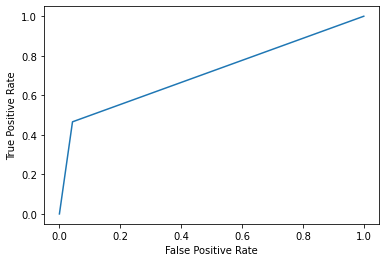

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = modelo2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Se escolhe qual o melhor modelo

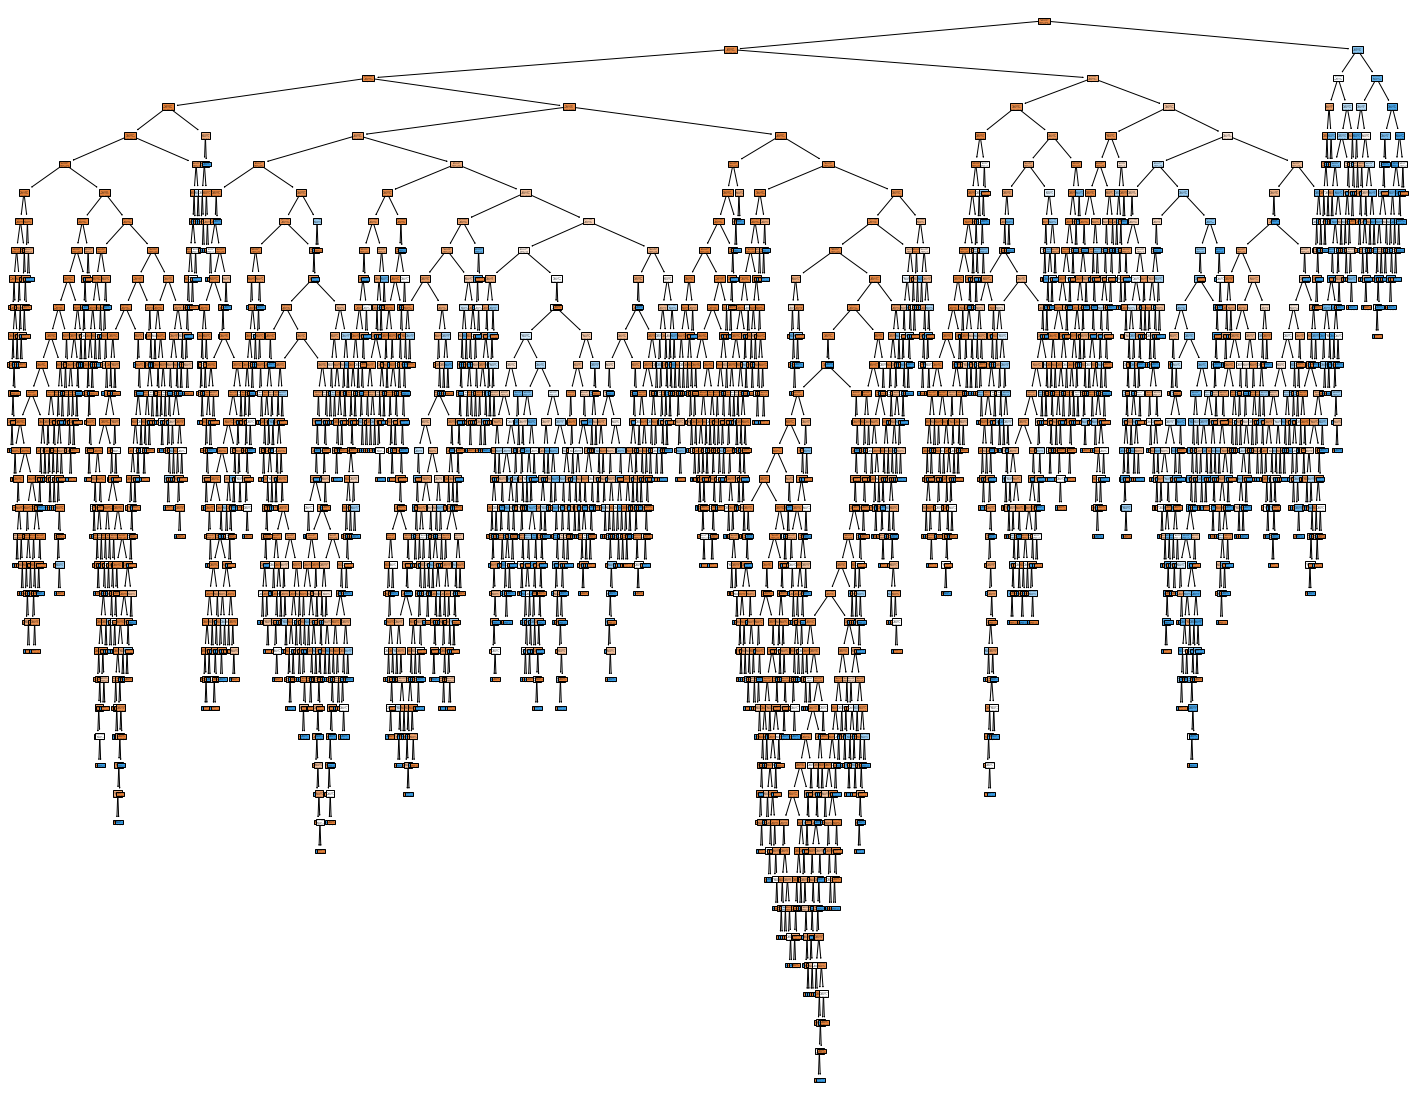

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(modelo2, filled=True)

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

modelo2 = KNeighborsClassifier()
scores = cross_val_score(modelo2, X, y, cv=5, scoring='accuracy')
scores

array([0.94411286, 0.9426959 , 0.94171912, 0.94182765, 0.94302149])

In [35]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.00)


In [36]:
from sklearn.model_selection import cross_val_predict
y_pred2 = cross_val_predict(modelo2, X, y, cv=5)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Validação de Hiperparâmetros com cross-validation

In [37]:
from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                              param_distributions = {'n_neighbors':range(2,10)} , 
                              scoring='accuracy', 
                              cv = 3,
                              n_iter = 50)

random_search_cv.fit(X,y)

print('Vizinhos máximo: {}'.format(random_search_cv.best_params_['n_neighbors']))
print('Desempenho Accuracy do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))

Vizinhos máximo: 8
Desempenho Accuracy do melhor modelo: 0.944
